In [11]:
import nltk
import pandas as pd

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\boykins\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
sid = SentimentIntensityAnalyzer()

In [17]:
df = pd.read_csv('amzn_final.csv')

In [18]:
df.head()

,Unnamed: 0,f_date,company,pct_change,article
0,2,2020-06-20,"Amazon.com, Inc. (AMZN)",0.014508,Amazon (NASDAQ:AMZN) will get its start in del...
1,3,2020-06-18,"Amazon.com, Inc. (AMZN)",0.004922,Valentino and Amazon (AMZN +0.1%) have filed a...
2,4,2020-06-18,"Amazon.com, Inc. (AMZN)",0.004922,Amazon (NASDAQ:AMZN) is hiring in South Africa...
3,6,2020-06-17,"Amazon.com, Inc. (AMZN)",0.009831,"Citing ""several forms of valuation"" that make ..."
4,8,2020-06-17,"Amazon.com, Inc. (AMZN)",0.009831,"Starting with its facility in Kent, Washington..."


In [19]:
df['scores'] = df['article'].apply(lambda Review: sid.polarity_scores(Review)['compound'])

In [20]:
df.head()

,Unnamed: 0,f_date,company,pct_change,article,scores
0,2,2020-06-20,"Amazon.com, Inc. (AMZN)",0.014508,Amazon (NASDAQ:AMZN) will get its start in del...,0.7506
1,3,2020-06-18,"Amazon.com, Inc. (AMZN)",0.004922,Valentino and Amazon (AMZN +0.1%) have filed a...,0.3919
2,4,2020-06-18,"Amazon.com, Inc. (AMZN)",0.004922,Amazon (NASDAQ:AMZN) is hiring in South Africa...,0.7003
3,6,2020-06-17,"Amazon.com, Inc. (AMZN)",0.009831,"Citing ""several forms of valuation"" that make ...",0.9538
4,8,2020-06-17,"Amazon.com, Inc. (AMZN)",0.009831,"Starting with its facility in Kent, Washington...",0.8750


In [27]:
chart = df[['f_date','pct_change','scores']] # for our chart we only need these columns

In [32]:
grouped  = chart.groupby(df['f_date']) # grouping by date to combine days where 2 articles were published

In [35]:
g_chart = grouped.mean() 

In [61]:
g_chart['pct_change'] = g_chart['pct_change']*100 # converting decimal to percenrage

In [63]:
g_chart['pct_change'].corr(g_chart['scores']) # to find the correlation

0.04920398772673205

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
x = g_chart.index
y1 = g_chart['scores']
y2  = g_chart['pct_change']

Text(0, 0.5, 'Sentiment Score')

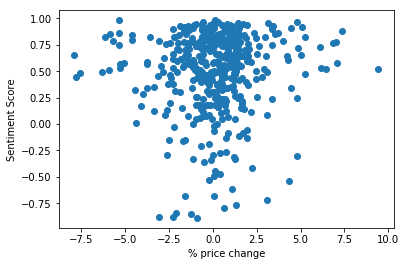

In [70]:
plt.plot(y2,y1,'o');
plt.xlabel('% price change')
plt.ylabel('Sentiment Score')

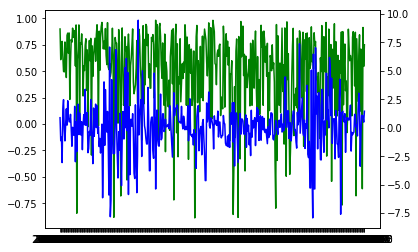

In [68]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')